<a href="https://colab.research.google.com/github/KamilBienias/data-science/blob/main/training/wykresy_pude%C5%82kowe_i_ca%C5%82ki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gęstość rozkładu normalnego N(0,1)

Oswajam się z plot w dokumentacji, ale on używa subplots


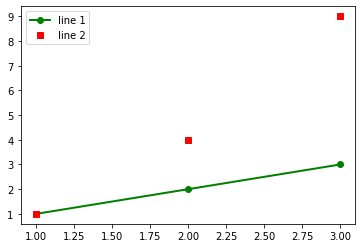


Powrót do gęstości.
x =
[-4.         -3.91919192 -3.83838384 -3.75757576 -3.67676768 -3.5959596
 -3.51515152 -3.43434343 -3.35353535 -3.27272727 -3.19191919 -3.11111111
 -3.03030303 -2.94949495 -2.86868687 -2.78787879 -2.70707071 -2.62626263
 -2.54545455 -2.46464646 -2.38383838 -2.3030303  -2.22222222 -2.14141414
 -2.06060606 -1.97979798 -1.8989899  -1.81818182 -1.73737374 -1.65656566
 -1.57575758 -1.49494949 -1.41414141 -1.33333333 -1.25252525 -1.17171717
 -1.09090909 -1.01010101 -0.92929293 -0.84848485 -0.76767677 -0.68686869
 -0.60606061 -0.52525253 -0.44444444 -0.36363636 -0.28282828 -0.2020202
 -0.12121212 -0.04040404  0.04040404  0.12121212  0.2020202   0.28282828
  0.36363636  0.44444444  0.52525253  0.60606061  0.68686869  0.76767677
  0.84848485  0.92929293  1.01010101  1.09090909  1.17171717  1.25252525
  1.33333333  1.41414141  1.49494949  1.57575758  1.65656566  1.73737374
  1.81818182  1.8989899   1.97979798  2.06060606  2.14141414  2.22222222
  2.3030303   2.38383838  2.

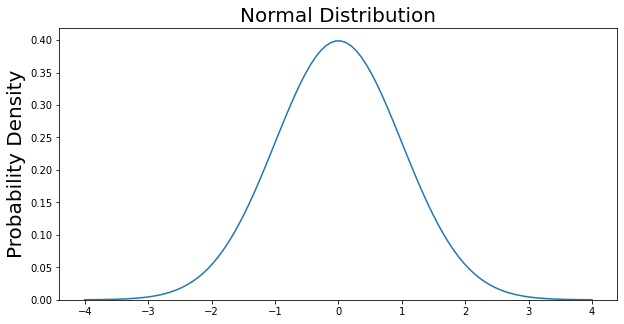

In [ ]:
# https://bulldogjob.pl/news/1430-jak-tworzyc-wykresy-pudelkowe

# Import all libraries for this portion of the blog post
from scipy.integrate import quad # całki
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print("Oswajam się z plot w dokumentacji, ale on używa subplots")
# green circle z kreseczkami
plt.plot([1, 2, 3], [1, 2, 3], 'go-', label='line 1', linewidth=2)
# red square
plt.plot([1, 2, 3], [1, 4, 9], 'rs', label='line 2')
# sam dorzuciłem te dwie linijki bo nie było w dokumentacji
plt.legend()
plt.show()

print()
print("Powrót do gęstości.")
# x to lista stu liczb od -4 do 4 (w równych odstępach)
x = np.linspace(-4, 4, num = 100)
print("x =")
print(x)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
# ustawia oś y od zera
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20);

## Oswajam się z subplots (wzięte z dokumentacji)

In [ ]:
print("First create some toy data:")
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

First create some toy data:


Create just a figure and only one subplot


Text(0.5, 1.0, 'Simple plot')

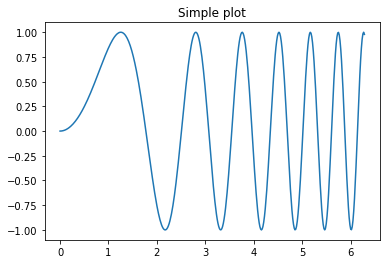

In [ ]:
print("Create just a figure and only one subplot")
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

Create two subplots and unpack the output array immediately


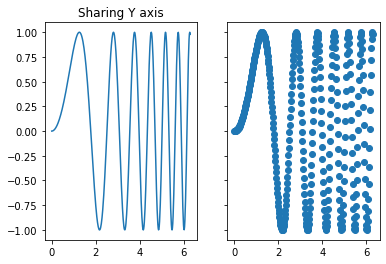

In [ ]:
print("Create two subplots and unpack the output array immediately")
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

Create four polar axes and access them through the returned array


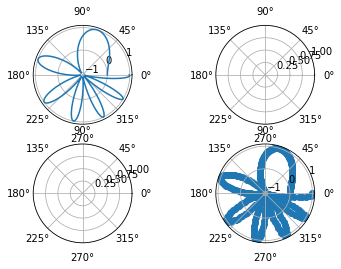

In [ ]:
print("Create four polar axes and access them through the returned array")
fig, axs = plt.subplots(2, 2, subplot_kw=dict(polar=True))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

Share a X axis with each column of subplots


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4648a29b0>,
       dtype=object))

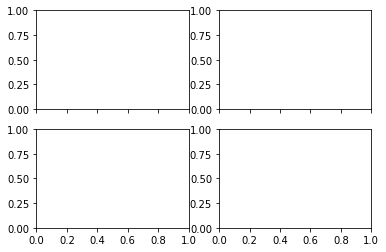

In [ ]:
print("Share a X axis with each column of subplots")
plt.subplots(2, 2, sharex='col')

Share a Y axis with each row of subplots


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff4646f2278>,
       dtype=object))

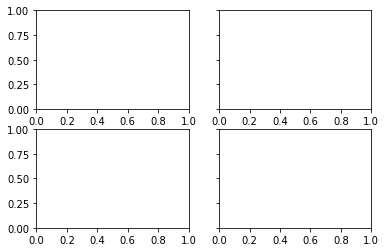

In [ ]:
print("Share a Y axis with each row of subplots")
plt.subplots(2, 2, sharey='row')

Share both X and Y axes with all subplots


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff464fd32e8>,
       dtype=object))

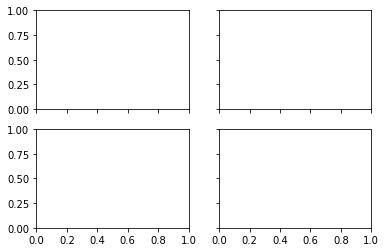

In [ ]:
print("Share both X and Y axes with all subplots")
plt.subplots(2, 2, sharex='all', sharey='all')

Note that this is the same as


(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff46455d5c0>,
       dtype=object))

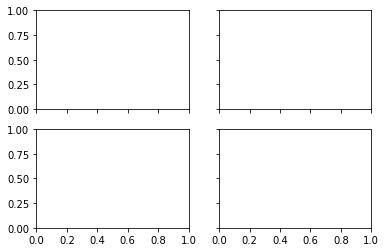

In [ ]:
print("Note that this is the same as")
plt.subplots(2, 2, sharex=True, sharey=True)

Create figure number 10 with a single subplot
and clears it if it already exists.


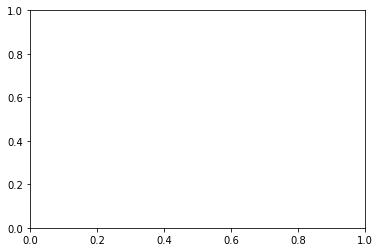

In [ ]:
print("Create figure number 10 with a single subplot")
print("and clears it if it already exists.")
fig, ax = plt.subplots(num=10, clear=True)

# Powrót do liczenia całki z gęstości

In [ ]:
print("Prawdopodobieństwo tego, że losowy punkt danych znajdzie się w przedziale")
print("międzykwartylowym równym .6745 odchylenia standardowego średniej,")
print("więc musimy całkować od -0,6745 do 0,6745.")
# Make PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -.6745 to .6745
# pierwszy to wynik a drugi to błąd bezwzględny
result_50p, _ = quad(normalProbabilityDensity, -.6745, .6745, limit = 1000)
print(result_50p)

Prawdopodobieństwo tego, że losowy punkt danych znajdzie się w przedziale
międzykwartylowym równym .6745 odchylenia standardowego średniej,
więc musimy całkować od -0,6745 do 0,6745.
0.5000065142726018


In [ ]:
print("To samo można zrobić dla „minimum” i „maximum”.")
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -2.698 to 2.698
result_99_3p, _ = quad(normalProbabilityDensity,
                     -2.698,
                     2.698,
                     limit = 1000)
print(result_99_3p)

To samo można zrobić dla „minimum” i „maximum”.
0.9930242559336101


In [ ]:
print("Dla każdej funkcji gęstości prawdopodobieństwa obszar pod krzywą musi wynosić 1.")
print("Prawdopodobieństwo wyciągnięcia dowolnej liczby z zakresu funkcji wynosi zawsze 1.")
print("To samo można zrobić dla „minimum” i „maximum”.")
# Make a PDF for the normal distribution a function
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )

# Integrate PDF from -2.698 to 2.698
result_99_3p, _ = quad(normalProbabilityDensity,
                     -np.inf,
                     np.inf,
                     limit = 1000)
print(result_99_3p)

Dla każdej funkcji gęstości prawdopodobieństwa obszar pod krzywą musi wynosić 1.
Prawdopodobieństwo wyciągnięcia dowolnej liczby z zakresu funkcji wynosi zawsze 1.
To samo można zrobić dla „minimum” i „maximum”.
0.9999999999999997


# Wykresy pudełkowe dla danych Breast Cancer Wisconsin (Diagnostic).

In [ ]:
print("Sczytuje dane do pandas dataframe.")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Put dataset on my github repo 
df = pd.read_csv('https://raw.githubusercontent.com/mGalarnyk/Python_Tutorials/master/Kaggle/BreastCancerWisconsin/data/data.csv')

Sczytuje dane do pandas dataframe.


Wykres pudełkowy służy nam do analizy związku między cechą jakościową (guz złośliwy lub łagodny) a cechą ciągłą (area_mean).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
df.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

Diagnosis oraz area_mean

In [ ]:
print("M oznacza - WDBC-Malignant czyli złośliwy.")
print("B oznacza - WDBC-Benign czyli łagodny.")
print()
print("diagnosis =")
print(df["diagnosis"])
print()
print("Rozkład targetu diagnosis.")
print(df["diagnosis"].value_counts())

print()
print("area_mean =")
print(df["area_mean"])

M oznacza - WDBC-Malignant czyli złośliwy.
B oznacza - WDBC-Benign czyli łagodny.

diagnosis =
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

Rozkład targetu diagnosis.
B    357
M    212
Name: diagnosis, dtype: int64

area_mean =
0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
564    1479.0
565    1261.0
566     858.1
567    1265.0
568     181.0
Name: area_mean, Length: 569, dtype: float64


## seaborn

Wykres w seaborn
AxesSubplot(0.125,0.125;0.775x0.755)


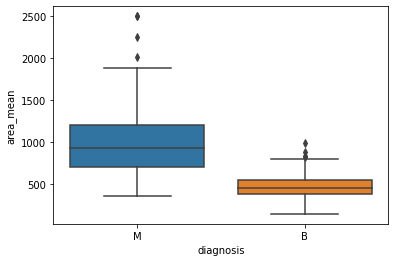

In [ ]:
print("Wykres w seaborn")
print(sns.boxplot(x='diagnosis', y='area_mean', data=df))

## matplotlib

Wybiera area_mean spośród diagnosis, w których jest M.
malignant =
0      1001.0
1      1326.0
2      1203.0
3       386.1
4      1297.0
        ...  
563    1347.0
564    1479.0
565    1261.0
566     858.1
567    1265.0
Name: area_mean, Length: 212, dtype: float64

Wybiera area_mean spośród diagnosis, w których jest B.
benign =
19     566.3
20     520.0
21     273.9
37     523.8
46     201.9
       ...  
558    657.1
559    403.5
560    600.4
561    386.0
568    181.0
Name: area_mean, Length: 357, dtype: float64


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7ff461baa080>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff461bcfb00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff461c122e8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff461c12160>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff461baa1d0>,
  <matplotlib.lines.Line2D at 0x7ff461c12e80>]}

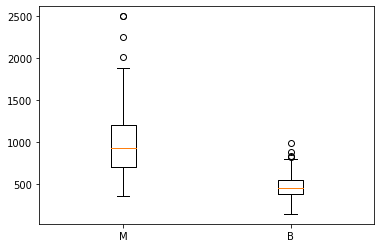

In [ ]:
print("Wybiera area_mean spośród diagnosis, w których jest M.")
malignant = df[df['diagnosis']=='M']['area_mean']
print("malignant =")
print(malignant)

print()
print("Wybiera area_mean spośród diagnosis, w których jest B.")
benign = df[df['diagnosis']=='B']['area_mean']
print("benign =")
print(benign)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([malignant, benign], labels=['M', 'B'])

## pandas

Bierze kolumnę area_mean i grupuje względem diagnosis.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, '')

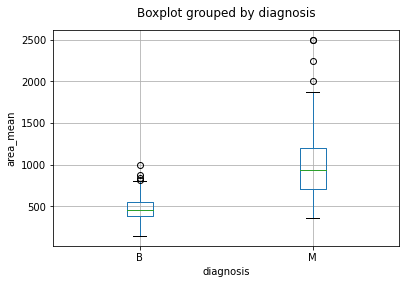

In [ ]:
print("Bierze kolumnę area_mean i grupuje względem diagnosis.")
df.boxplot(column = 'area_mean', by = 'diagnosis');
plt.ylabel("area_mean")
plt.title('')

## moje w seaborn

Wybrałem 10 cech i dla nich wykresy pudełkowe


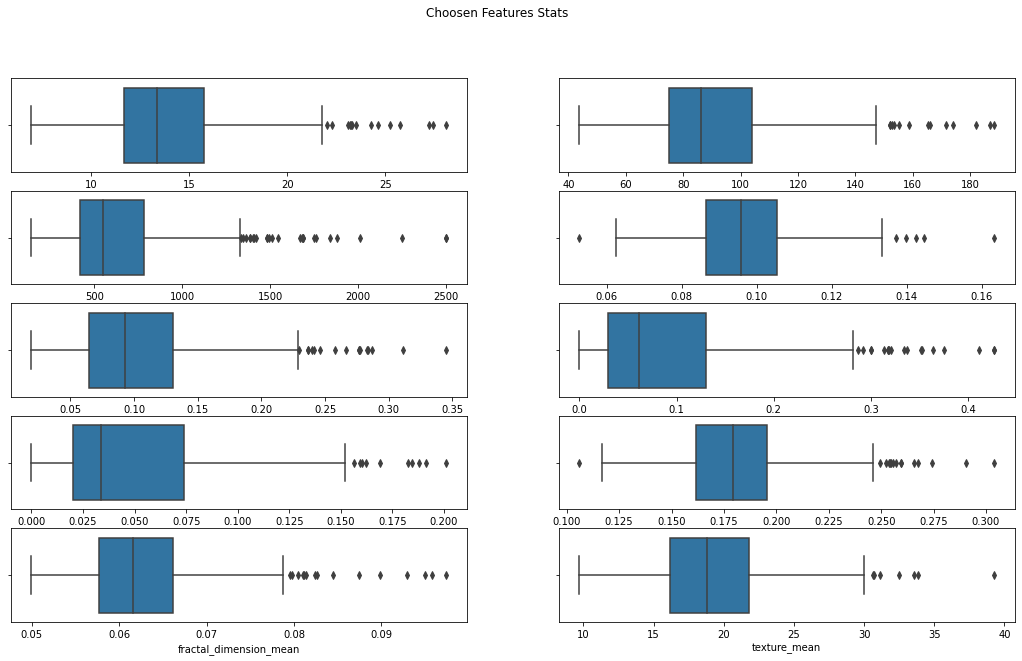

In [ ]:
# wzorowałem się na tej stronie
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

print("Wybrałem 10 cech i dla nich wykresy pudełkowe")
import matplotlib.pyplot as plt

# sharex=True powoduje że za bardzo się zwężały
fig, axes = plt.subplots(5, 2, figsize=(18, 10))
fig.suptitle('Choosen Features Stats')

sns.boxplot(ax=axes[0, 0], data=df, x='radius_mean')
sns.boxplot(ax=axes[0, 1], data=df, x='perimeter_mean')
sns.boxplot(ax=axes[1, 0], data=df, x='area_mean')
sns.boxplot(ax=axes[1, 1], data=df, x='smoothness_mean')
sns.boxplot(ax=axes[2, 0], data=df, x='compactness_mean')
sns.boxplot(ax=axes[2, 1], data=df, x='concavity_mean')
sns.boxplot(ax=axes[3, 0], data=df, x='concave points_mean')
sns.boxplot(ax=axes[3, 1], data=df, x='symmetry_mean')
sns.boxplot(ax=axes[4, 0], data=df, x='fractal_dimension_mean')
sns.boxplot(ax=axes[4, 1], data=df, x='texture_mean')

# Zawężony wykres pudełkowy (ocena przedziałów ufności).

Zawężony wykres pudełkowy umożliwia ocenę przedziałów ufności
(domyślnie 95% przedział ufności) dla median każdego wykresu pudełkowego.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


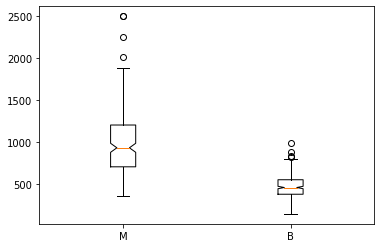

In [ ]:
print("Zawężony wykres pudełkowy umożliwia ocenę przedziałów ufności")
print("(domyślnie 95% przedział ufności) dla median każdego wykresu pudełkowego.")

malignant = df[df['diagnosis']=='M']['area_mean']
benign = df[df['diagnosis']=='B']['area_mean']

fig = plt.figure()
ax = fig.add_subplot(111)
# notch = True wygeneruje karbowany wykres pudełkowy. W przeciwnym razie a
# powstaje prostokątny wykres pudełkowy. Wycięcia reprezentują
# przedział ufności (CI - confidence interval) wokół mediany.
ax.boxplot([malignant,benign], notch = True, labels=['M', 'B']);